I will scrap novels from web and plot word frequency distributions in the novels.

I will use Python packages: requests, BeautifulSoup and nltk(Natural Language ToolKit.

Agenda:
* state question
* get data
* extract data
* answer question
* present solution

**1. State your question**

What are the words frequencies in the novel Moby Dick?

**2. Get your data**

fine the URL that relates to Moby Dick

In [2]:
url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'

fetch the HTML(Hypertext Markup Language) of this website

In [4]:
import requests
r = requests.get(url)
type(r)

requests.models.Response

this is a Response object, which has a text attribute that can get HTML 

In [6]:
html = r.text
#print(html)

**3. Extract the data to answer the question**

Part 1: get text from the HTML

In [7]:
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(html,"html5lib")

In [9]:
type(soup)

bs4.BeautifulSoup

extract title

In [10]:
soup.title

<title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>

or extract title as a string

In [11]:
soup.title.string

'\n      Moby Dick; Or the Whale, by Herman Melville\n    '

or all URLs found within a <a> tags(hyperlinks):
   

In [12]:
soup.findAll('a')[:5]

[<a href="#link2H_4_0002"> ETYMOLOGY. </a>,
 <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
         </a>,
 <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>,
 <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>,
 <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>]

extract text from the soup

In [14]:
text = soup.get_text()
#print(text)

Part 2: extract words from the text with NLP

use nltk to tokenize the text(split into words) and remove stopwords

step 1: tokenize

as a warm up, try to extract all words start with letter 'p'

In [15]:
#import regex
import re

In [16]:
sentence = 'peter piper a of'

#define regex:
#'\w': match any A-Z, a-z, 0-9
#'+': the previous character can appear as many time as you want
ps = 'p\w+'
re.findall(ps,sentence)

['peter', 'piper']

find all words and print them

In [17]:
re.findall('\w+',sentence)

['peter', 'piper', 'a', 'of']

now do the same with text

In [21]:
tokens = re.findall('\w+',text)
tokens[:5]

['ï', 'Moby', 'Dick', 'Or', 'the']

There is another way to do this with nltk

In [25]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')

#create tokens
tokens = tokenizer.tokenize(text)
tokens[:5]

['ï', 'Moby', 'Dick', 'Or', 'the']

Notice that word 'Or' and 'or' should be the same word

In [26]:
words = []
for word in tokens:
    words.append(word.lower())
words[:5]

['ï', 'moby', 'dick', 'or', 'the']

step 2: remove stop words

In [27]:
import nltk
sw = nltk.corpus.stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [28]:
words_ns = []
for word in words:
    if word not in sw:
        words_ns.append(word)
words_ns[:5]

['ï', 'moby', 'dick', 'whale', 'herman']

**Answer question**

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

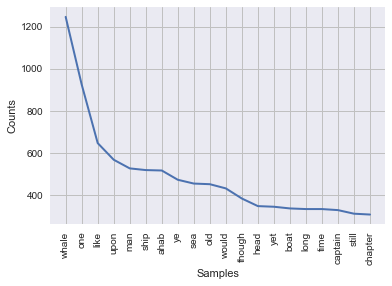

In [31]:
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(20)

The graph shows that 'whale' is the most common word in the novel excepting stopwords. It occurs over 1200 times.